<a href="https://colab.research.google.com/github/Misha-private/Demo-repo/blob/main/MGBF_NN0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

iter, MSE = 0 ... 0.14164191977885301
iter, MSE = 2 ... 0.012582158051643358
iter, MSE = 4 ... 0.011790716678233677
iter, MSE = 6 ... 0.011322419369581307
iter, MSE = 8 ... 0.011043840334002674
iter, MSE = 10 ... 0.010843549472756777
iter, MSE = 12 ... 0.010667202602868969
iter, MSE = 14 ... 0.010495728241343618
iter, MSE = 16 ... 0.010323663842399883
iter, MSE = 18 ... 0.010149654866058084
iter, MSE = 20 ... 0.00997344583131679
iter, MSE = 22 ... 0.009795071174085188
iter, MSE = 24 ... 0.009614655639044147
iter, MSE = 26 ... 0.009432367442660395
iter, MSE = 28 ... 0.009248407682012853
iter, MSE = 30 ... 0.00906300789565802
iter, MSE = 32 ... 0.008876429115731785
iter, MSE = 34 ... 0.008688960780081582
iter, MSE = 36 ... 0.008500919054562467
iter, MSE = 38 ... 0.008312644414494965
iter, MSE = 40 ... 0.008124498434003754
iter, MSE = 42 ... 0.007936859788301418
iter, MSE = 44 ... 0.0077501195218280415
iter, MSE = 46 ... 0.007564675681034738
iter, MSE = 48 ... 0.0073809274538074645
iter, 

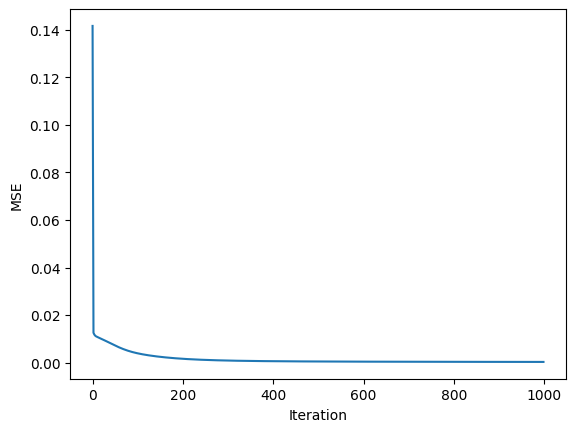

In [17]:
# More data

import numpy as np
from numpy import exp, array, random, dot


class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):
        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1


class NeuralNetwork():

    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, err_acum,iter_acum,
              number_of_training_iterations, iteration_increment):

        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network
            output_from_layer_1, output_from_layer_2 = self.think(training_set_inputs)

            # Calculate the error for layer 2 (The difference between the desired output
            # and the predicted output).
            layer2_error = training_set_outputs  - output_from_layer_2
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)

            if iteration%iteration_increment==0 :
              #print("Output from layer_2", training_set_outputs, output_from_layer_2 )
              #print("Iteration: ", iteration, )
              #print("Layer 2 Mean Squared Error (MSE): " )
              mse = np.mean(layer2_error**2)

              err_acum.append(mse)
              iter_acum.append(iteration)

              print(f"iter, MSE = {iteration} ... {mse}")

            # Calculate the error for layer 1 (By looking at the weights in layer 1,
            # we can determine by how much layer 1 contributed to the error in layer 2).
            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)

            # Calculate how much to adjust the weights by
            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)

            # Adjust the weights.
            self.layer1.synaptic_weights += layer1_adjustment
            self.layer2.synaptic_weights += layer2_adjustment

    # Plot MSE
    def plot_mse(self, err_acum, iter_acum):
      import matplotlib.pyplot as plt
      plt.plot(iter_acum, err_acum)
      plt.xlabel('Iteration')
      plt.ylabel('MSE')

    # The neural network thinks.
    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs, self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        return output_from_layer1, output_from_layer2

    # The neural network prints its weights
    def print_weights(self):
        print ("    Input layer (9 neurons each with 10 examples and 10 outputs)")
        print ("    Layer 1 (`` neurons, each with 10 inputs): ")
        print (self.layer1.synaptic_weights)
        print ("    Layer 2 (1 neuron, with 10 inputs):")
        print (self.layer2.synaptic_weights)

#
# Main program
#

if __name__ == "__main__":

    #Seed the random number generator
    random.seed(1)

    # Create layer 1 (10 neurons, each with 9 inputs)
    layer1 = NeuronLayer(10, 9)

    # Create layer 2 (1 neuron with 10 inputs)
    layer2 = NeuronLayer(1, 10)

    # Combine the layers to create a neural network
    neural_network = NeuralNetwork(layer1, layer2)

    #print ("Stage 1) Random starting synaptic weights: ")
    #neural_network.print_weights()

    # The training set. We have 10 examples, each consisting of 9 input values
    # and 1 output value.
    training_set_inputs = array([[0.009, 0.048, 0.285, 0.018, 0.097, 0.571, 0.027, 0.145, 0.856],
     [0.112, 0.162, 0.014, 0.409, 0.458, 0.310, 0.902, 0.952, 0.804],
     [0.007, 0.006, 0.012, 0.000, 0.154, 0.309, 0.000, 0.500, 1.000],
     [0.010, 0.070, 0.099, 0.070, 0.140, 0.169, 0.099, 0.169, 0.198],
     [0.198, 0.148, 0.049, 0.148, 0.123, 0.074, 0.049, 0.074, 0.123],
     [0.013, 0.036, 0.013, 0.036, 0.099, 0.036, 0.013, 0.036, 0.013],
     [0.099, 0.049, 0.020, 0.049, 0.033, 0.016, 0.020, 0.016, 0.011],
     [0.700, 0.049, 0.198, 0.049, 0.074, 0.148, 0.079, 0.089, 0.119],
     [0.044, 0.083, 0.090, 0.000, 0.166, 0.148, 0.180, 0.249, 0.269],
     [0.494, 0.329, 0.055,0.329, 0.226, 0.040, 0.165, 0.119, 0.023] ])

    training_set_outputs = array([[0.006, 0.285, 0.028, 0.076, 0.173, 0.060, 0.066, 0.03, 0.071, 0.384]]).T

    # Train the neural network using the training set.
    # Do it 60,000 times and make small adjustments each time.

    err_acum = []
    iter_acum = []

    neural_network.train(training_set_inputs, training_set_outputs, err_acum, iter_acum,
                         iteration_increment=2, number_of_training_iterations=1000)
    neural_network.plot_mse(err_acum, iter_acum)

    #print("Stage 2) New synaptic weights after training: ")
    #neural_network.print_weights()

    # Test the neural network with a new situation.
    #print ("Stage 3) Considering a new situation [0.296, 0.025, 0.506, 0.246, 0.042, 0.444, 0.216, 0.037] -> ?: ")
    hidden_state, output = neural_network.think(array([0.296, 0.144, 0.025, 0.506, 0.246, 0.042, 0.444, 0.216, 0.037]))
    #print(output)